In [2]:
import pypsa
import matplotlib.pyplot as plt
import pandas as pd
import myUtils as utils

pathTail = "/networks/base_s_27_3H_3H_2045.nc"



plt.style.use('bmh')
%matplotlib inline

nBase = pypsa.Network(f"../../results/scenario/base{pathTail}")



INFO:pypsa.io:Imported network base_s_27_3H_3H_2045.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


/opt/anaconda3/envs/pypsa-eur/lib/python3.12/site-packages/squarify/__init__.py:231: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap()


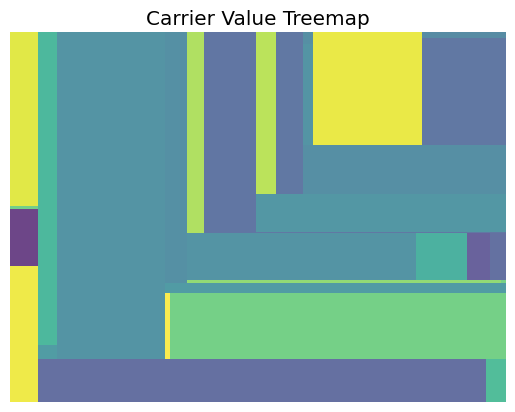

In [11]:
import myUtils as utils
import importlib
importlib.reload(utils)

s = nBase.statistics.capex(groupby=["carrier","de_grouper"]).groupby('carrier').sum()
# print(s.sum())
# df = s.to_frame('value')

# print(df)
# # print(utils.dataframe_to_table(df))

squarify.plot(sizes=s.values,  alpha=.8,)
plt.axis('off')  # 去掉坐标轴
plt.title('Carrier Value Treemap')  # 设置标题
plt.show()

In [112]:
import myUtils as utils
import plotly.express as px
import importlib
importlib.reload(utils)

s = nBase.statistics.capex(groupby=["carrier","de_grouper"]).groupby('carrier').sum() / 1e9
# print(s.sum())
# df = s.to_frame('value')

# print(df)
# # print(utils.dataframe_to_table(df))

# s.rename(index={
#   "AC": "AC<br>Leitung",
#   "DAC": "DAC",
#   "DC": "DC<br>Leitung",
#   "Fischer-Tropsch": "Fischer<br>Tropsch",
#   "H2 Electrolysis": "H2<br>Elektrolyse",
#   "H2 Store": "H2<br>Speicher",
#   "H2 pipeline": "H2<br>Pipeline",
#   "Offshore Wind (AC)": "Offshore-<br>Wind (AC)",
#   "Offshore Wind (DC)": "Offshore-Wind (DC)",
#   "Offshore Wind (Floating)": "Schwimmende<br>Offshore-Windkraft",
#   "Onshore Wind": "Onshore-Wind",
#   "Open-Cycle Gas": "OCGT",
#   "SMR": "Dampfreformierung",
#   "SMR CC": "Dampfreformierung mit Kohlendioxidgewinnung",
#   "Sabatier": "Sabatier-Prozess",
#   "Solar": "Solar",
#   "co2 sequestered": "CO2 <br>Abs-<br>cheid",
#   "co2 stored": "CO2 <br>gespeichert",
#   "electricity distribution grid": "Stromverteilungs<br>netz",
#   "gas": "Gas",
#   "gas for industry CC": "Gas <br>Industrie",
#   "gas pipeline": "Gaspipeline",
#   "gas pipeline new": "Neue Gaspipeline",
#   "methanolisation": "Methanolisierung",
#   "rural air heat pump": "Ländliche<br>Luftwärmepumpe",
#   "rural gas boiler": "Ländlicher<br>Gaskessel",
#   "rural ground heat pump": "Ländliche<br>Erdwärmepumpe",
#   "rural resistive heater": "Ländlicher Widerstandsheizgerät",
#   "rural solar thermal": "Ländliche Solarthermie",
#   "solar rooftop": "Solar auf dem Dach",
#   "solar-hsat": "Solar-HSAT",
#   "solid biomass for industry CC": " Biomasse für <br>die Industrie",
#   "urban central CHP": "Zentrales CHP",
#   "urban central CHP CC": "Zentrales CHP mit CC",
#   "urban central air heat pump": "Zentrale<br>Luftwärmepumpe<br>für Städte",
#   "urban central gas boiler": "Zentraler Gaskessel für Städte",
#   "urban central resistive heater": "Zentraler Widerstandsheizgerät<br>fürStädte",
#   "urban central solar thermal": "Zentrale Solarthermie<br>für Städte",
#   "urban decentral air heat pump": "Dezentrale<br>Luftwärmepumpe<br>für Städte",
#   "urban decentral gas boiler": "Dezentraler<br>Gaskessel<br>für Städte",
#   "urban decentral resistive heater": "Dezentraler<br>Widerstandsheizgerät für<br>Städte",
#   "urban decentral solar thermal": "Dezentrale<br>Solarthermie für<br>Städte"
# }
# , inplace=True)


df = s.reset_index()


df.columns = ['carrier', 'Mrd. EUR']


fig = px.treemap(df, path=['carrier'], values='Mrd. EUR', title='Carrier Value Treemap'
                 , color="Mrd. EUR"
                #  , pathbar_textfont_size=15

                 ,color_continuous_scale=px.colors.sequential.Aggrnyl )

fig.update_layout(
    # uniformtext=dict(minsize=20, mode="show"),

    width=1600,  # 设置图表宽度
    height=1200, # 设置图表高度
    # paper_bgcolor= 'white',
    # plot_bgcolor = 'white',
)
# 显示图形
fig.show()

print(list(s.index))


['AC', 'DAC', 'DC', 'Fischer-Tropsch', 'H2 Electrolysis', 'H2 Store', 'H2 pipeline', 'Offshore Wind (AC)', 'Offshore Wind (DC)', 'Offshore Wind (Floating)', 'Onshore Wind', 'Open-Cycle Gas', 'SMR', 'SMR CC', 'Sabatier', 'Solar', 'co2 sequestered', 'co2 stored', 'electricity distribution grid', 'gas', 'gas for industry CC', 'gas pipeline', 'gas pipeline new', 'methanolisation', 'rural air heat pump', 'rural gas boiler', 'rural ground heat pump', 'rural resistive heater', 'rural solar thermal', 'solar rooftop', 'solar-hsat', 'solid biomass for industry CC', 'urban central CHP', 'urban central CHP CC', 'urban central air heat pump', 'urban central gas boiler', 'urban central resistive heater', 'urban central solar thermal', 'urban decentral air heat pump', 'urban decentral gas boiler', 'urban decentral resistive heater', 'urban decentral solar thermal']


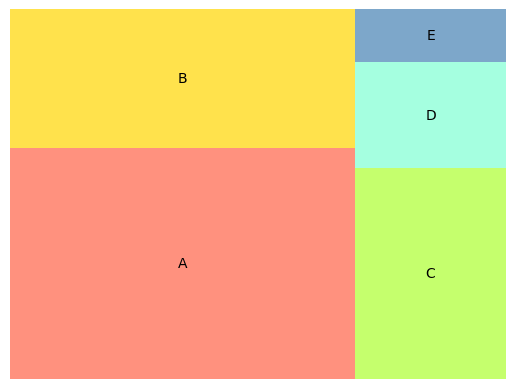

In [6]:
import matplotlib.pyplot as plt
import squarify

# 数据：每个方块的大小
sizes = [500, 300, 200, 100, 50]

# 创建颜色列表
colors = ['#FF6347', '#FFD700', '#ADFF2F', '#7FFFD4', '#4682B4']

# 绘制树状图
squarify.plot(sizes=sizes, color=colors, label=["A", "B", "C", "D", "E"], alpha=.7)

# 去除坐标轴
plt.axis('off')

# 显示图形
plt.show()